In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc

#21.2
Low = [16.1 , 16.8 , 17.8 , 18.5 , 19.3 , 20.1 , 21.2 , 21.7 , 22.6 , 23.1 , 23.5 , 24.1 , 25.3 , 25.4]

Amplitude = []
Udspændt = []
stedsted=[]

In [3]:
for Hz in Low:
    Rådata = np.genfromtxt(f"{Hz} MHz.csv" , delimiter=',' , skip_header=2)
    Tid = Rådata[:,0]* 10**(-3)
    CA = Rådata[:,1]
    CB = Rådata[:,2]

    Periode = 1 / 50
    Antal_svingninger = (Tid[-1]-Tid[0]) / Periode 

    SvingA = []
    SvingB = []
    for i in range(0,int(Antal_svingninger)):
        Maske = (Tid[0] + Periode * i <Tid) & (Tid[0]+ Periode * (i+1) >Tid)
        xx = Tid[Maske]
        yyA = CA[Maske]
        yyB = CB[Maske]
        SvingA.append([xx,yyA])
        SvingB.append([xx,yyB])
    # plt.plot(*SvingA[0])
    # plt.plot(*SvingB[0])

    Amp = []
    Ud = []
    for x in range(0,int(Antal_svingninger)):
        Amp.append(np.max(SvingB[x][1]))
        Ud.append(np.max(SvingA[x][1]))


    Udspændt.append([50 , np.mean(Ud) , np.std(Ud)])
    Amplitude.append([50 , np.mean(Amp) , np.std(Amp)])


    Amplitude_mindre = []
    Udspændt_mindre = []
    sted = []

    SvingA_mindre = []
    SvingB_mindre = []

    for x in range(0, len(SvingA)):
        Maske_mindre = (SvingB[x][0][0] < SvingB[x][0]) & ((SvingB[x][0][int(len(SvingB[x][0])/3)]) >SvingB[x][0])

        xx_mindre = SvingB[x][0][Maske_mindre]
        yyA_mindre = SvingA[x][1][Maske_mindre]
        yyB_mindre = SvingB[x][1][Maske_mindre]
        SvingA_mindre.append([xx_mindre,yyA_mindre])
        SvingB_mindre.append([xx_mindre,yyB_mindre])

        Amp_mindre = []
        Ud_mindre = []

        Amp_mindre.append(np.min(SvingB_mindre[x][1]))
        Ud_mindre.append(np.min(SvingA_mindre[x][1]))



        Udspændt_mindre.append([Hz , np.mean(Ud_mindre) , np.std(Ud_mindre)])
        Amplitude_mindre.append([Hz , np.mean(Amp_mindre) , np.std(Amp_mindre)])

        np.where(Amplitude_mindre[x][1] == SvingB_mindre[x][1])
        sted.append(SvingA_mindre[x][1][np.where(Amplitude_mindre[x][1] == SvingB_mindre[x][1])[0][0]])
    stedsted.append(sted)



In [4]:
len(stedsted)


14

array([ 0.34055727, -0.30639802])

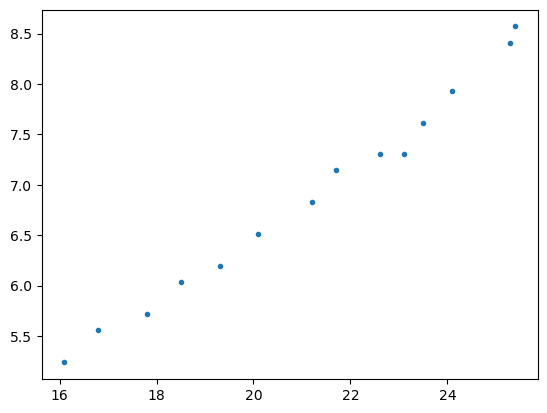

In [10]:
ss = []
for x in range(0,14):
    ss.append(stedsted[x][0])
plt.plot(Low, ss, '.')

def lin(x,a,b):
    return a*x+b

para , usikker = sc.optimize.curve_fit(lin, Low, ss)
para

0.21273864181545224

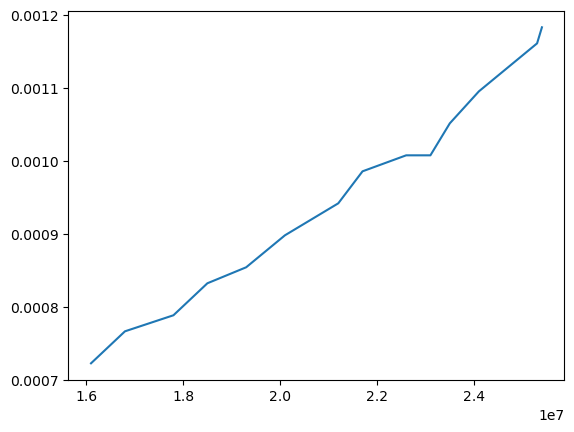

In [37]:
mu_0 = 1.2566 * 10 **(-6)
#Der omregnes fra volt til strøm:
Strøm = ss / np.sqrt(5**2 + 2**2)
#Der omregnes fra strøm til magnetfelt:
Magnet = (16*np.sqrt(5)/25)*124*mu_0*Strøm/0.3

plt.plot(Lowlow,Magnet)
para , usikker = sc.optimize.curve_fit(lin, Lowlow , Magnet)
1/para[0]/10**11

In [27]:
Lowlow = np.array(Low)*10**6

In [ ]:
Amplitude_mindre = []
Udspændt_mindre = []
sted = []

SvingA_mindre = []
SvingB_mindre = []

for x in range(0, len(SvingA)):
    for xx in range(0,1):
        Maske_mindre = (SvingB[x][0][0] < SvingB[x][0]) & ((SvingB[x][0][int(len(SvingB[x][0])/3)]) >SvingB[x][0])

        xx_mindre = SvingB[x][0][Maske_mindre]
        yyA_mindre = SvingA[x][1][Maske_mindre]
        yyB_mindre = SvingB[x][1][Maske_mindre]
        SvingA_mindre.append([xx_mindre,yyA_mindre])
        SvingB_mindre.append([xx_mindre,yyB_mindre])

        Amp_mindre = []
        Ud_mindre = []

        Amp_mindre.append(np.min(SvingB_mindre[x][1]))
        Ud_mindre.append(np.min(SvingA_mindre[x][1]))



        Udspændt_mindre.append([Hz , np.mean(Ud_mindre) , np.std(Ud_mindre)])
        Amplitude_mindre.append([Hz , np.mean(Amp_mindre) , np.std(Amp_mindre)])

        np.where(Amplitude_mindre[x][1] == SvingB_mindre[x][1])
        sted.append(SvingA_mindre[x][1][np.where(Amplitude_mindre[x][1] == SvingB_mindre[x][1])[0][0]])

print(sted)

[8.571428, 7.936033, 8.571428, 8.094729, 8.094729, 8.412122, 8.571428, 8.412122, 8.253426, 7.936033]


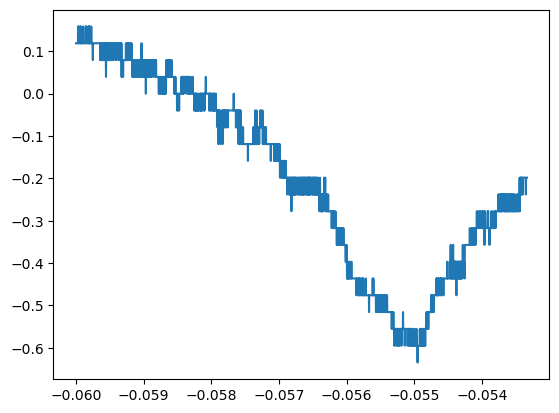

In [ ]:
plt.plot(*SvingB_mindre[2])

In [ ]:
A = np.array([1,2,3])
np.where(A==2)[0][0]

1

In [ ]:
len(sc.signal.find_peaks(Rådata[:,2])[0])

11034

In [ ]:
SvingB_mindre[0][1]

array([0.1190222 , 0.1190222 , 0.07934812, ..., 0.        , 0.        ,
       0.        ])

In [ ]:
CA

array([1.586962, 1.586962, 1.586962, ..., 1.428266, 1.428266, 1.586962])